## Computing Drawdowns

## Develop code to compute drawdowns



In [1]:
import pandas as pd
me_m = pd.read_csv("Portfolios_Formed_on_ME_monthly_EW.csv",
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)

# Creating a Return Series


# To extract the lowest and highest 10%

rets = me_m[['Lo 20', 'Hi 20']]

# To rename the columns

rets.columns = ['Small Cap', 'Large Cap']

# to get percentages in decimal form

rets = rets/100
rets


,Small Cap,Large Cap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


<AxesSubplot:>

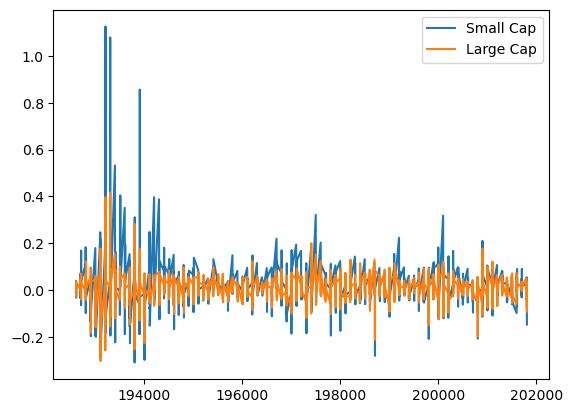

In [2]:
rets.plot.line()

In [3]:
rets.head()

,Small Cap,Large Cap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [4]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [5]:
# dtype='int64' is Not Good

# To change: 

rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.head()

,Small Cap,Large Cap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [6]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [7]:
rets.index = rets.index.to_period('M')
rets.head()

,Small Cap,Large Cap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [8]:
rets.loc["1975"]

,Small Cap,Large Cap
1975-01,0.3208,0.1526
1975-02,0.0625,0.0574
1975-03,0.0973,0.0367
1975-04,0.0298,0.0501
1975-05,0.0807,0.0564
1975-06,0.0768,0.0637
1975-07,0.0144,-0.0643
1975-08,-0.0536,-0.0195
1975-09,-0.0353,-0.0398
1975-10,0.0030,0.0595


In [9]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [10]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1110 entries, 1926-07 to 2018-12
Freq: M
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Small Cap  1110 non-null   float64
 1   Large Cap  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


## Compute Drawdowns

1. Compute Wealth index
2. Compute previous peaks
3. Compute drawdown-- which is wealth value as a percentage of previous peak

In [11]:
wealth_index = 1000*(1+rets["Large Cap"]).cumprod()
wealth_index.head()

1926-07    1033.300000
1926-08    1057.375890
1926-09    1056.424252
1926-10    1025.259736
1926-11    1057.657944
Freq: M, Name: Large Cap, dtype: float64

<AxesSubplot:>

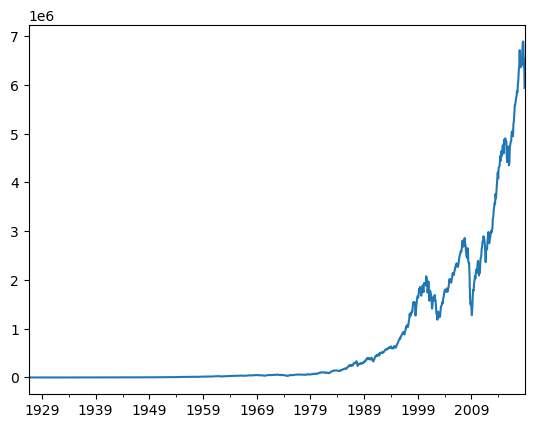

In [12]:
wealth_index.plot.line()

<AxesSubplot:>

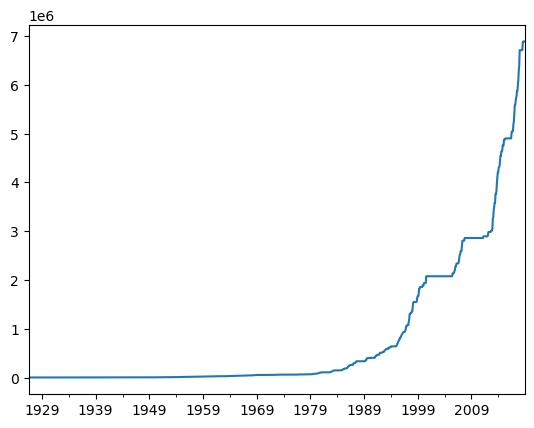

In [13]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

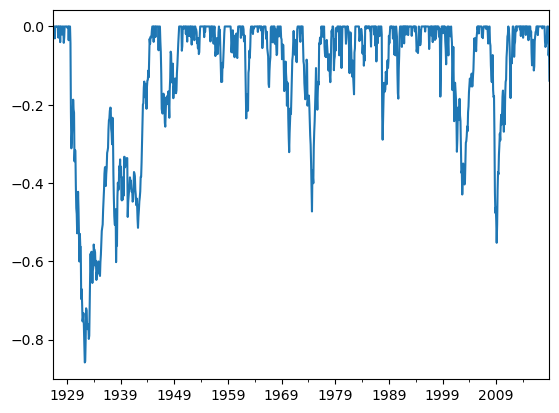

In [14]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [15]:
drawdown.head()

1926-07    0.000000
1926-08    0.000000
1926-09   -0.000900
1926-10   -0.030373
1926-11    0.000000
Freq: M, Name: Large Cap, dtype: float64

In [16]:
drawdown.min()

-0.8585017065044246

In [17]:
#  Largest drawdown since 1975

drawdown["1975":].min()

-0.5527349978713652

In [18]:
# To find out when this drawdown happened?

drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [19]:
# Worst drawdown in whole series

drawdown.idxmin()

Period('1932-05', 'M')

In [20]:
# Creating a function where I can give it the series and compute different things

def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    the percentage drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })


In [21]:
drawdown(rets["Large Cap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1033.300000,1033.300000,0.000000
1926-08,1057.375890,1057.375890,0.000000
1926-09,1056.424252,1057.375890,-0.000900
1926-10,1025.259736,1057.375890,-0.030373
1926-11,1057.657944,1057.657944,0.000000


In [22]:
drawdown(rets["Large Cap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1033.300000,1033.300000
1926-08,1057.375890,1057.375890
1926-09,1056.424252,1057.375890
1926-10,1025.259736,1057.375890
1926-11,1057.657944,1057.657944


<AxesSubplot:>

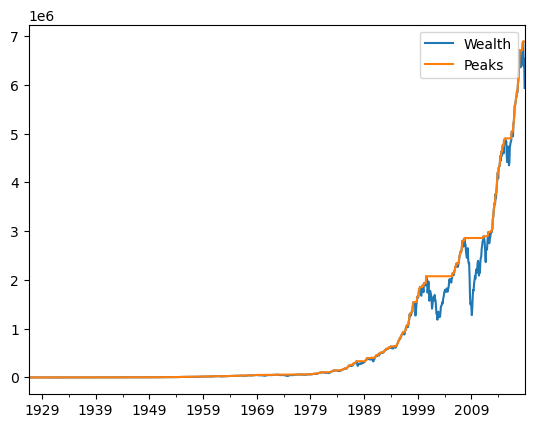

In [23]:
drawdown(rets["Large Cap"])[["Wealth", "Peaks"]].plot()

<AxesSubplot:>

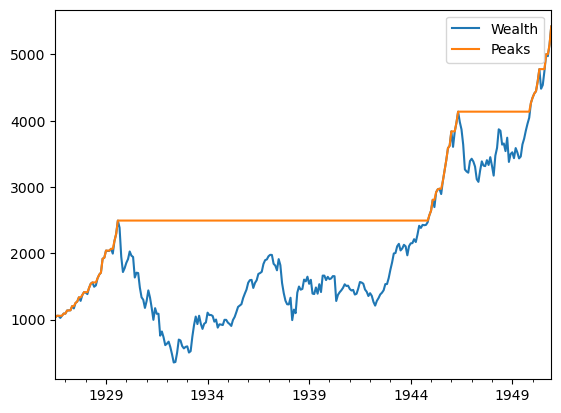

In [24]:
drawdown(rets[:"1950"]["Large Cap"])[["Wealth", "Peaks"]].plot()

In [25]:
drawdown(rets["Large Cap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1033.300000,1033.300000,0.000000
1926-08,1057.375890,1057.375890,0.000000
1926-09,1056.424252,1057.375890,-0.000900
1926-10,1025.259736,1057.375890,-0.030373
1926-11,1057.657944,1057.657944,0.000000


In [26]:
drawdown(rets["Large Cap"])["Drawdown"].min()

-0.8585017065044246

In [27]:
drawdown(rets["Small Cap"])["Drawdown"].min()

-0.8672279770834406

In [28]:
drawdown(rets["Large Cap"])["Drawdown"].idxmin()


Period('1932-05', 'M')

In [29]:
drawdown(rets["Small Cap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [30]:
# SMall cap draw downs 1940 on 

drawdown(rets["1940":]["Small Cap"])["Drawdown"].min()

-0.6964152456794854

In [31]:

drawdown(rets["1940":]["Small Cap"])["Drawdown"].idxmin()

Period('1974-12', 'M')

In [32]:
drawdown(rets["1999":"2015"]["Small Cap"])["Drawdown"].min()

-0.6248092431236988

In [33]:
drawdown(rets["1999":"2015"]["Small Cap"])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [34]:
drawdown(rets["1999":"2015"]["Large Cap"])["Drawdown"].min()

-0.5527349978713653

In [35]:
drawdown(rets["1999":"2015"]["Large Cap"])["Drawdown"].idxmin()

Period('2009-02', 'M')